In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/HR_comma_sep.csv')

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.shape

(14999, 10)

<Axes: xlabel='salary'>

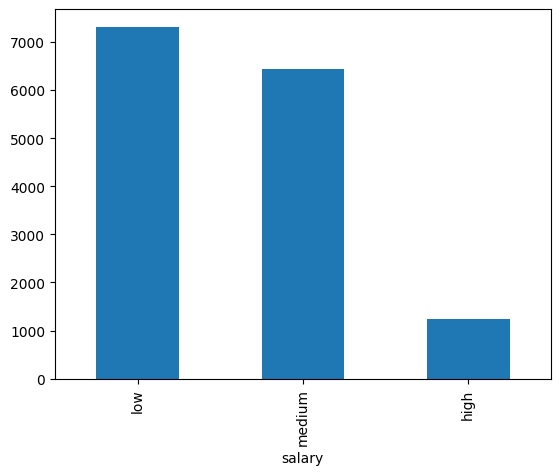

In [9]:
df.salary.value_counts().plot(kind='bar')

<Axes: xlabel='Department'>

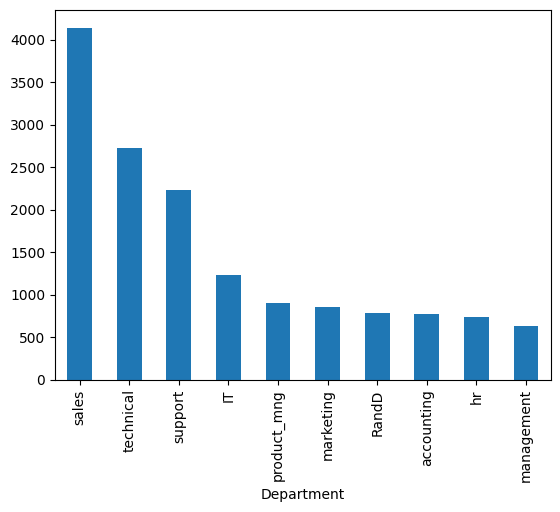

In [10]:
df.Department.value_counts().plot(kind='bar')

In [58]:
df.Department.value_counts()

Department
7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: count, dtype: int64

<Axes: xlabel='left'>

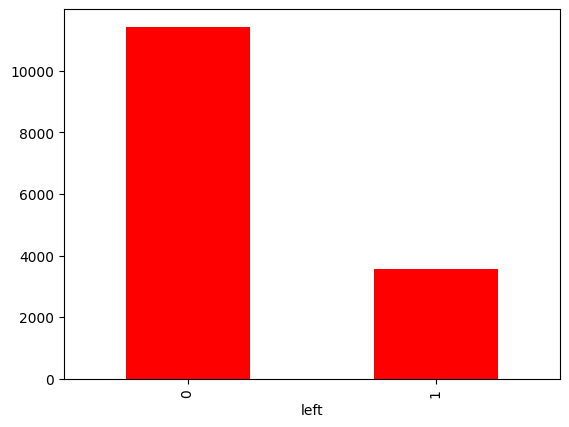

In [13]:
df.left.value_counts().plot(kind='bar',color="r")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Label encoding

In [16]:
#df['Department']replace({'sales':1, "technical":2, "support":3, "IT": 4,"product_mng":5, "marketing": 6, "RandD": 7, "accounting": 8, "hr":9 , "management": 10  })

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Department']=le.fit_transform(df['Department'])

df['Department'].value_counts()

Department
7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: count, dtype: int64

In [17]:
df['salary']=le.fit_transform(df['salary'])

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [26]:
#X=df.iloc[:,0:9]
X=df.drop('left', axis=1)
y=df['left']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

lr=LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lr.score(X_train, y_train)

0.7691474289524127

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(X_test))

0.7573333333333333

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9999166597216435

In [31]:
accuracy_score(y_test, rf.predict(X_test))

0.9886666666666667

# dump random forest model in pickle

In [41]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))


# load pickle model

In [57]:
model=pickle.load(open('model.pkl', 'rb'))


ss=model.predict(X_test)


[0 0 0 ... 0 0 1]


In [68]:
import warnings
warnings.filterwarnings('ignore')

condition=model.predict([[0.60, 0.90,5,220,2,1,0,5,2]])
if condition==0:
  print("Employee organization not left")
else:
  print("Employee organization left")

Employee organization not left


In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
bagging=BaggingClassifier(estimator=SVC(), n_estimators=10)
bagging.fit(X_train, y_train)
bagging.score(X_train, y_train)



0.7848987415617968

In [33]:
y_pred=bagging.predict(X_test)

accuracy_score(y_test, y_pred)


0.7843333333333333

In [34]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.004245175918980881

In [35]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

print("R2_score : ",r2_score(y_test, lasso.predict(X_test)))
print("mean_squared_error : ",np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
print("MEA : ",mean_absolute_error(y_test, lasso.predict(X_test)))

R2_score :  0.0011575617511188074
mean_squared_error :  0.4239613785686028
MEA :  0.36131804050512484


In [36]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1000)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.1441648039880884

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
boost=GradientBoostingClassifier(n_estimators=1000000, learning_rate=1.0,max_depth=1, random_state=42)
boost.fit(X_train, y_train)
boost.score(X_train, y_train) #55

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=10000, learning_rate=5.0)
ada.fit(X_train, y_train)
ada.score(X_train, y_train)

In [77]:
# model = pickle.load(open('/content/model.pkl', 'rb'))

# condition = model.predict(X_test)

# if condition== [0]:
#     #result = "Employee has not left the organization"
#     print("result")
# else:
#     #result = "Employee has left the organization"
#     print("!result")

result="None"
condition=model.predict([[0.38, 0.53,2,157,3,0,0,0,0]])
if condition==0:
  result="Employee organization not left"
else:
  result="Employee organization left"

In [78]:
result

'Employee organization left'